In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('Customer Churn.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [16]:
#Replacing Blanks with 0 as tenure is 0 and no total charges are recorded.

df["TotalCharges"] = df["TotalCharges"].replace("  ", "0")
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')
df["TotalCharges"] = df["TotalCharges"].fillna(0)


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [19]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [20]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [26]:
df["customerID"].duplicated().sum()

np.int64(0)

In [32]:
def Conv(Value):
    if Value == 1:
        return "Yes"
    elif Value == 0:
        return "No"

df["SeniorCitizen"] = df["SeniorCitizen"].apply(Conv)

#Converted 0 and 1 values of senior citizen to yes/no to make it easier to understand


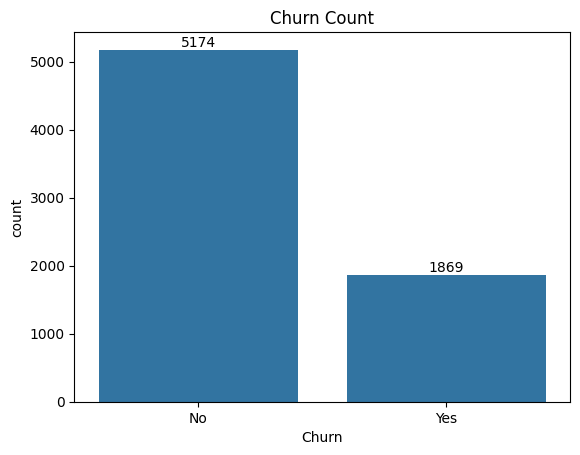

In [41]:
ax = sns.countplot( x = df['Churn'], data = df)
ax.bar_label(ax.containers[0])
plt.title('Churn Count')
plt.show()

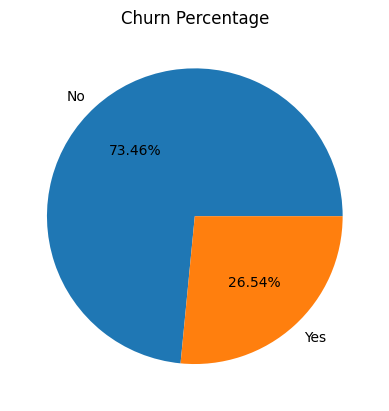

In [45]:
plt.pie(df['Churn'].value_counts(), labels=df['Churn'].value_counts().index, autopct='%1.2f%%')
plt.title('Churn Percentage')
plt.show()

In [46]:
#Form the given pie chart we can conclude that 26.54% of our customer have churned out.

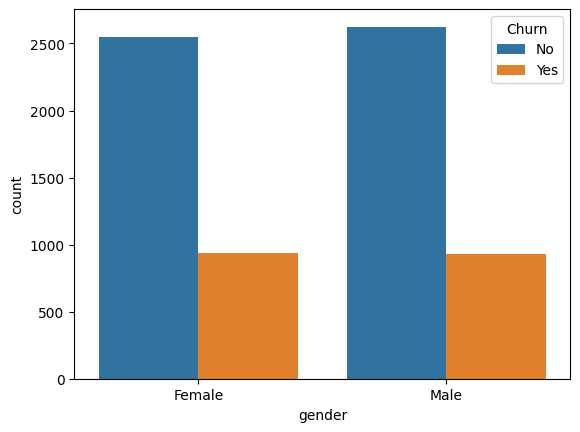

In [49]:
sns.countplot(x = df['gender'], hue = df['Churn'], data = df)
plt.show()

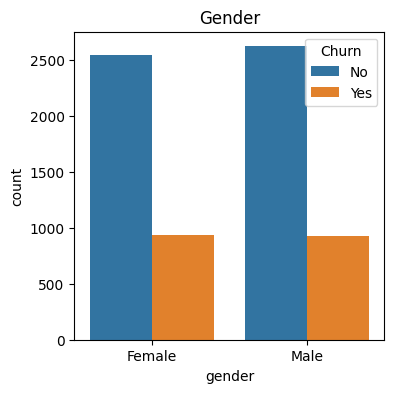

In [55]:
plt.figure(figsize=(4,4))
sns.countplot(x='gender', hue='Churn', data=df)
plt.title('Gender')
plt.show()

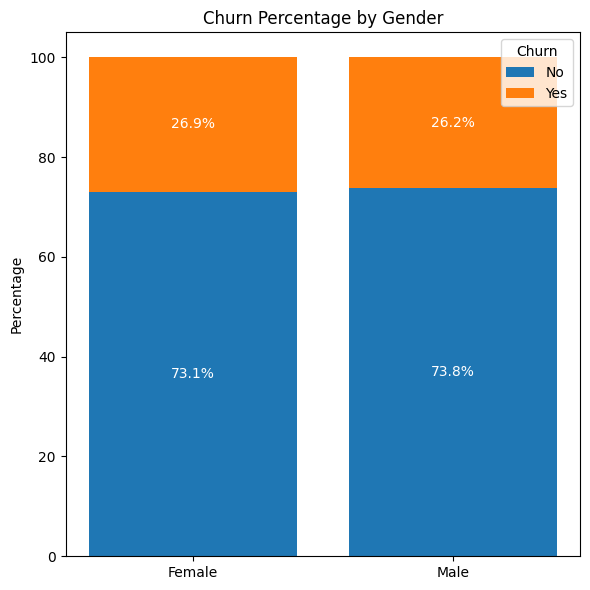

In [57]:
group_counts = df.groupby(['gender', 'Churn']).size().unstack()
group_percent = group_counts.div(group_counts.sum(axis=1), axis=0) * 100

fig, ax = plt.subplots(figsize=(6, 6))
bottom = [0] * len(group_percent)

for churn_status in group_percent.columns:
    values = group_percent[churn_status]
    ax.bar(group_percent.index, values, bottom=bottom, label=churn_status)

    for i, (b, v) in enumerate(zip(bottom, values)):
        if v > 0:
            ax.text(i, b + v/2, f'{v:.1f}%', ha='center', va='center', color='white', fontsize=10)

    bottom = [b + v for b, v in zip(bottom, values)]

ax.set_ylabel('Percentage')
ax.set_title('Churn Percentage by Gender')
ax.legend(title='Churn')
plt.tight_layout()
plt.show()


In [58]:
#Comparativer a greater percentage of people in the category have churned

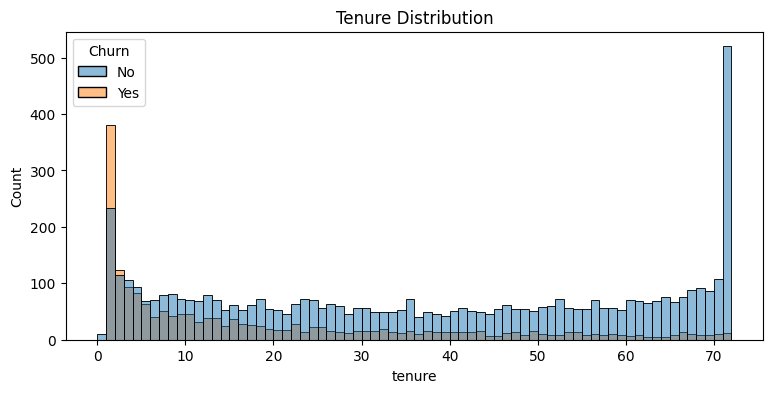

In [62]:
plt.figure(figsize=(9,4))
sns.histplot(x = "tenure", data = df, bins= 72, hue= "Churn")
plt.title('Tenure Distribution')
plt.show()

In [63]:
#People who have used our services for long time have stayed and people who have used the our services #1 or 2 months have churned

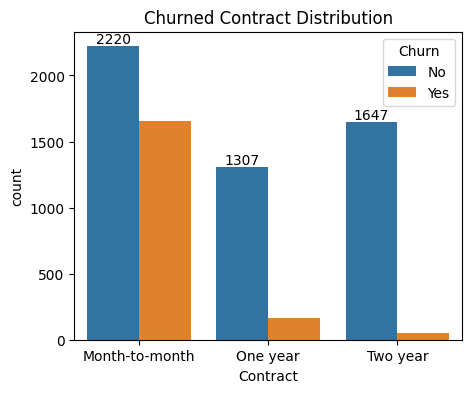

In [95]:
plt.figure(figsize=(5,4))
ax = sns.countplot(x = "Contract", data = df, hue= "Churn")
ax.bar_label(ax.containers[0])
plt.title('Churned Contract Distribution')
plt.show()

In [68]:
#People who have month to month contract are likely to churn then from who have 1 or 2 years or contract

In [69]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

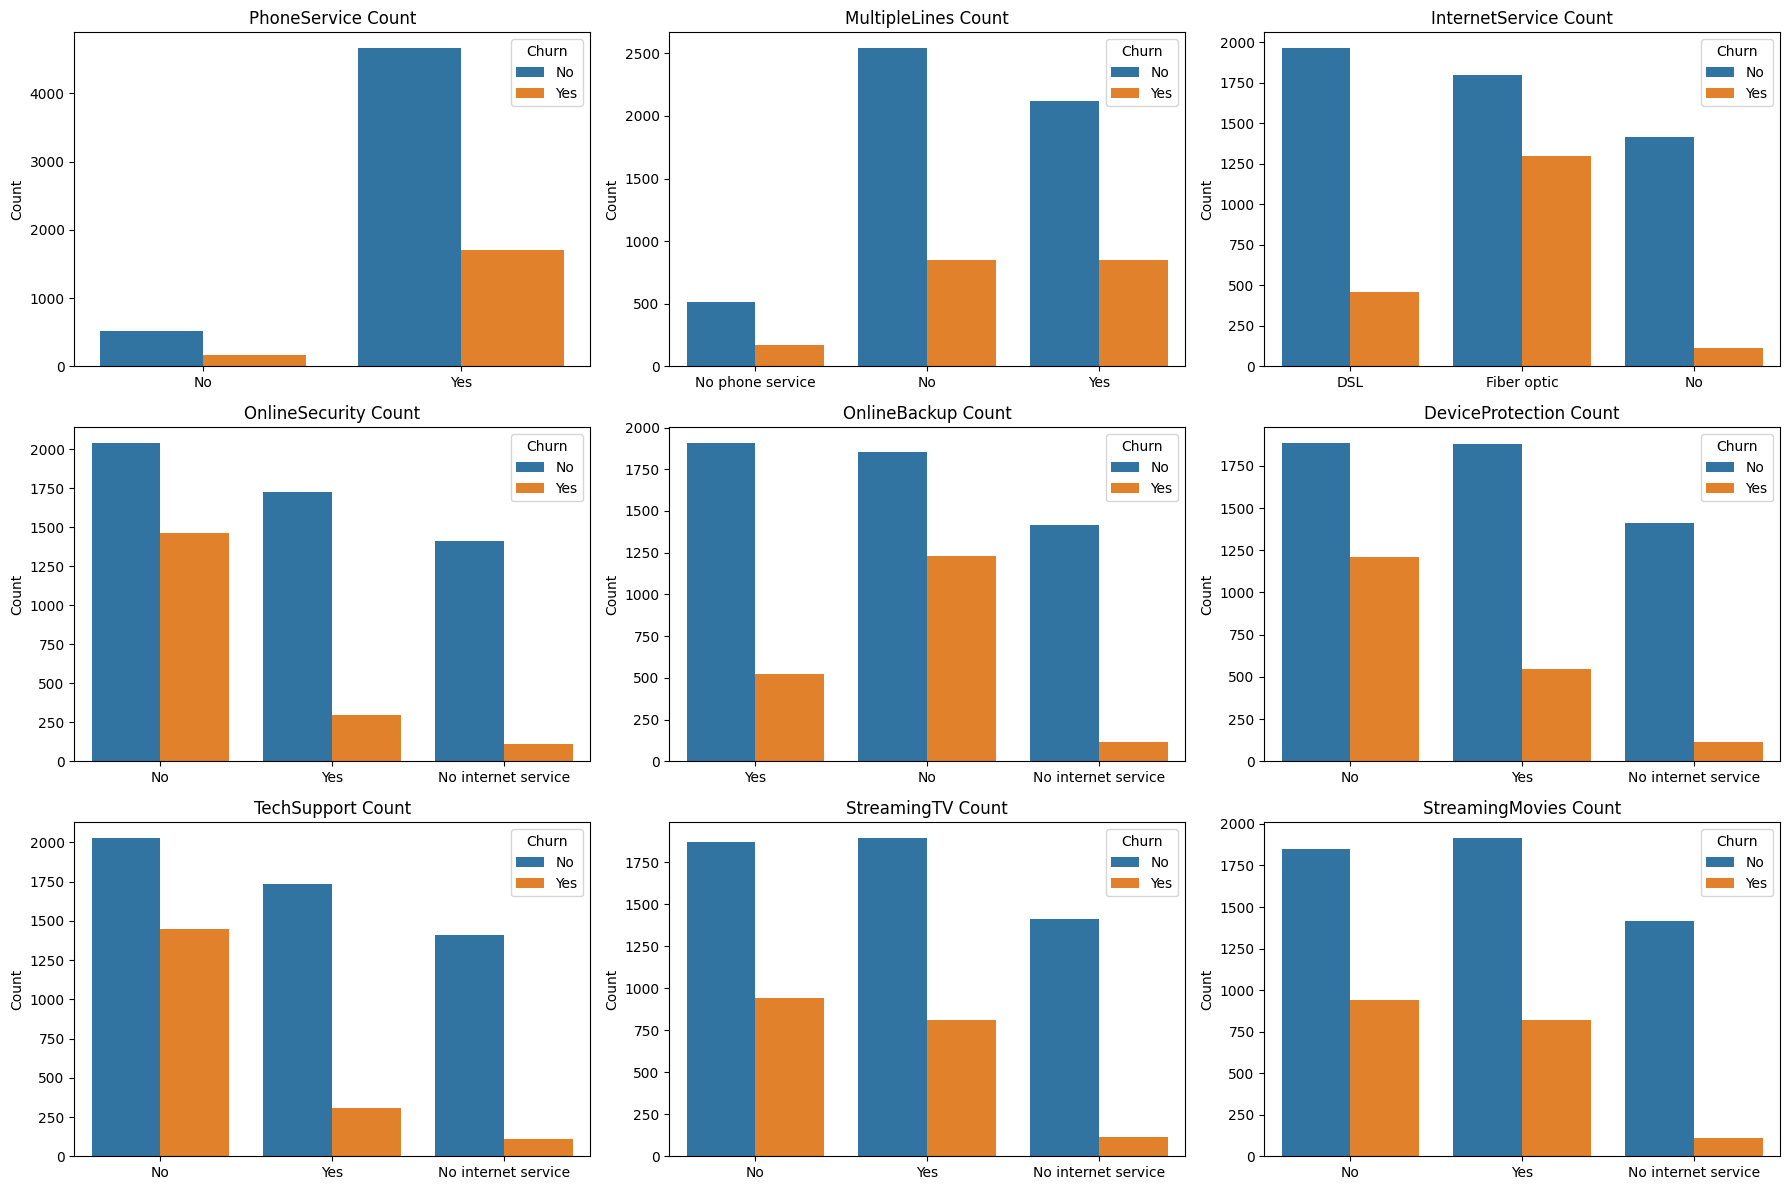

In [87]:
# List of categorical columns
cols = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Set figure size and layout
rows = 3
cols_per_row = 3
fig, axes = plt.subplots(rows, cols_per_row, figsize=(18, 12))
axes = axes.flatten()  # Flatten the 2D array of axes

# Plot each column as a countplot
for i, col in enumerate(cols):
    sns.countplot(x=col, data=df, ax=axes[i], hue = "Churn")
    axes[i].set_title(f'{col} Count')
    axes[i].tick_params(axis='x', rotation= 0)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

# Hide any unused subplots (if any)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [79]:
#Here’s a summary based on the countplot subplots

#Customers without online services (like Security, Backup, Tech Support) tend to churn more, especially when the service is marked "No" rather than "No internet service".
#Fiber optic internet users have a noticeably higher churn rate compared to DSL or no internet users.
#Streaming services (TV and Movies) also show higher churn among users who have access compared to those without.
#Phone service users are more likely to churn than those without, but multiple lines don't show a significant churn difference.

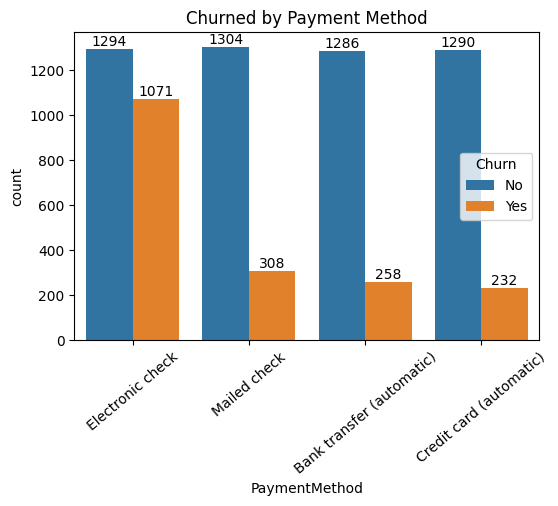

In [94]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x = "PaymentMethod", data = df, hue= "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.xticks(rotation=40)
plt.title('Churned by Payment Method')
plt.show()

In [96]:
#Customer is likely to churn when is using electronic check as a payment method.